In [1]:
print "ready"

ready


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import seaborn as sns
import pprint
from pylab import *

In [3]:
path = 'E:/SUBJECTS/497 MATH S17 PSP--/Data/'
interpath= 'E:/SUBJECTS/497 MATH S17 PSP--/Data/intermediate/'

Original data

In [5]:
family_hist=pd.read_pickle(path+'family_hist_list.pickle')
print family_hist.shape
print len(family_hist.Person_Nbr.drop_duplicates())
family_hist.head()

(59203, 7)
14044


,Person_ID,Person_Nbr,Date_Created,Code,Code_System,Family_History,Relation
47872,80d3df88-dddf-5ad3-7cc1-b7b1ac6151fa,33,2014-12-18 14:47:15.980,160347007,SNOMED,Glaucoma,Father
47869,80d3df88-dddf-5ad3-7cc1-b7b1ac6151fa,33,2014-12-18 14:47:26.897,160274005,SNOMED,No history of Diabetes mellitus,Mother
47867,80d3df88-dddf-5ad3-7cc1-b7b1ac6151fa,33,2014-12-18 14:47:28.590,160274005,SNOMED,No history of Diabetes mellitus,Father
47871,80d3df88-dddf-5ad3-7cc1-b7b1ac6151fa,33,2014-12-18 14:47:29.563,160267000,SNOMED,No history of Glaucoma,Mother
47868,80d3df88-dddf-5ad3-7cc1-b7b1ac6151fa,33,2014-12-18 15:55:35.837,439724007,SNOMED,Heart disease,Brother


3488 Null values in Code and Code_System

In [39]:
sum(pd.isnull(family_hist.Code_System))

3488

444 Unique relationships 

In [13]:
print len(family_hist.Relation.unique())
family_hist.Relation.unique()

444


array(['Father', 'Mother', 'Brother', 'Sister', 'Paternal uncle',
       'Maternal grandfather', nan, 'Maternal grandmother', 'Daughter',
       'Maternal aunt', 'Family', 'Paternal grandmother', 'Maternal uncle',
       'Paternal grandfather', 'Son', 'Cousin', 'mother',
       'Younger brother', 'Niece', 'Twin brother', 'Sister Daughter',
       "Mother's side", "Father's side", 'siblings', 'Sister (4 of them)',
       'Father and sister', 'family history', 'Aunt', 'Cousins',
       'Maternal great aunt', 'Unknown', 'Nephew', 'Multiple Relatives',
       'Parents', 'Paternal aunt', 'Family history', 'Mother Father Sist',
       'Mother sister', 'Uncle', 'MGF', 'MGM brother', 'Brother sister',
       'Aunt (maternal)', 'Sickle', 'Mothers Side', 'Fathers Side',
       'parents', 'everyone', 'Multiple', 'father', 'Mother & Father',
       'Motherfathersis', 'Mother Sister', 'Siblings',
       'Mother brother fat', 'Brother mother', 'Mother MGM',
       'Grandparents both', 'father sister

Cleaned the data: 
Grouped all relations into six categories and imputed codes at 2296 places from mapping the Family_History column to Code and background research

In [4]:
fam_his=pd.read_csv(interpath+'family_hist-csv (1).csv')
print fam_his.shape
print "Unique Person_Nbrs:"
print len(fam_his.Person_Nbr.drop_duplicates())
print "null values:"
print sum(pd.isnull(fam_his.Code))
print len(fam_his.Relation.unique())
print fam_his.Relation.unique()
fam_his.head()

(59186, 9)
Unique Person_Nbrs:
14044
null values:
1192
6
['Parents' 'Siblings' 'Relatives' 'Grandparents' 'Children' 'Spouse']


,Column,index,Person_ID,Person_Nbr,Date_Created,Code,Code_System,Family_History,Relation
0,0,47872,80d3df88-dddf-5ad3-7cc1-b7b1ac6151fa,33,2014-12-18 14:47:15.980,160347007.0,SNOMED,Glaucoma,Parents
1,1,47869,80d3df88-dddf-5ad3-7cc1-b7b1ac6151fa,33,2014-12-18 14:47:26.897,160274005.0,SNOMED,No history of Diabetes mellitus,Parents
2,2,47867,80d3df88-dddf-5ad3-7cc1-b7b1ac6151fa,33,2014-12-18 14:47:28.590,160274005.0,SNOMED,No history of Diabetes mellitus,Parents
3,3,47871,80d3df88-dddf-5ad3-7cc1-b7b1ac6151fa,33,2014-12-18 14:47:29.563,160267000.0,SNOMED,No history of Glaucoma,Parents
4,4,47868,80d3df88-dddf-5ad3-7cc1-b7b1ac6151fa,33,2014-12-18 15:55:35.837,439724007.0,SNOMED,Heart Disease,Siblings


In [5]:
del fam_his["Column"]

Understanding and plotting the frequencies 

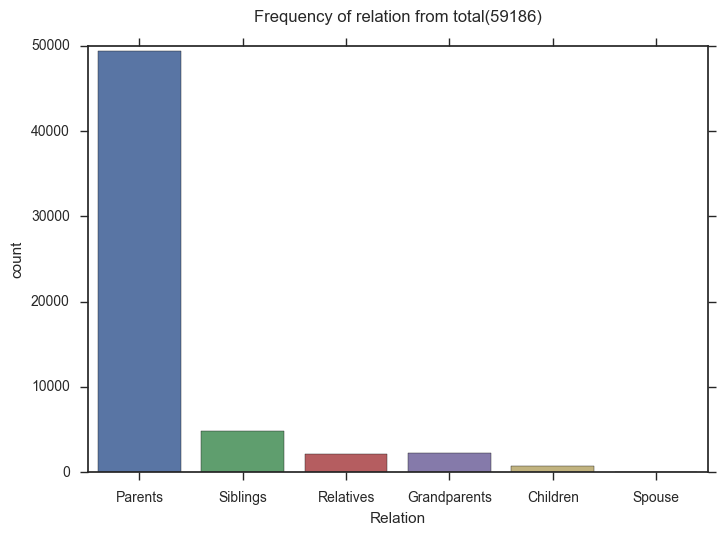

In [7]:
sns.set(style="ticks", color_codes=True)
sns.countplot(x="Relation", data=fam_his)
plt.title("Frequency of relation from total(59186)\n")
sns.plt.show()

Grouping by relation and counting frequency once per patient

In [8]:
#frequency of relation on person level
relfr={k:len(v.drop_duplicates()) for k,v in fam_his.groupby('Relation').Person_Nbr}
relfr1=sorted(relfr.items(), key=lambda x:x[1], reverse=True)
relfr1

[('Parents', 13095),
 ('Siblings', 2988),
 ('Grandparents', 1469),
 ('Relatives', 1469),
 ('Children', 519),
 ('Spouse', 3)]

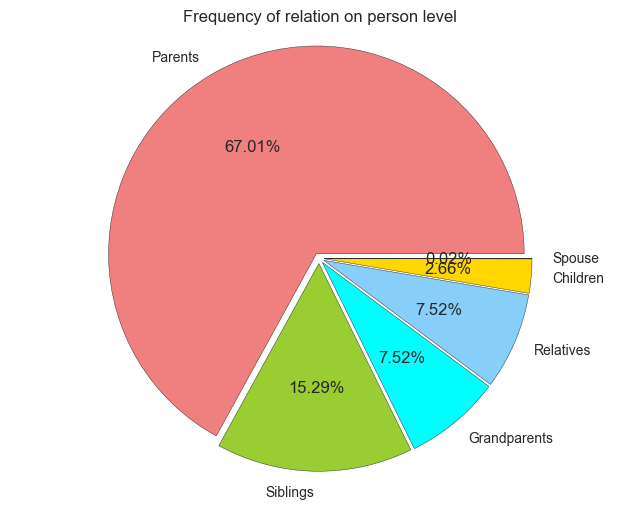

In [10]:
labels = 'Parents', 'Siblings', 'Grandparents', 'Relatives',"Children","Spouse"
fracs = [relfr1[0][1],relfr1[1][1],relfr1[2][1],relfr1[3][1],relfr1[4][1],relfr1[5][1]]
colors = ['lightcoral', 'yellowgreen', 'cyan', 'lightskyblue','gold','blue']
explode = (0.025, 0.025, 0.025, 0.025,0.025,0.025)  # explode 1st slice
plt.pie(fracs, labels=labels,autopct='%1.2f%%',colors=colors,explode=explode)
plt.axis('equal')
plt.title('Frequency of relation on person level\n')
plt.show()

Most frequent codes 

Grouping by Codes and counting frequency once per patient


Code	 Frequency	 Description

[(160267000.0, 9066, 'No history of Glaucoma'),
 (160274005.0, 7937, 'No history of Diabetes mellitus'),
 (416855002.0, 7021, 'Diabetes'),
 (160357008.0, 3812, 'HBP'),
 (160347007.0, 3003, 'Glaucoma'),
 (407559004.0, 1674, 'Unknown'),
 (430679000.0, 1637, 'Diabetes Type 2'),
 (160303001.0, 1139, 'Diabetes'),
 (439724007.0, 732, 'Heart Disease'),
 (275134007.0, 693, 'Arthritis')]


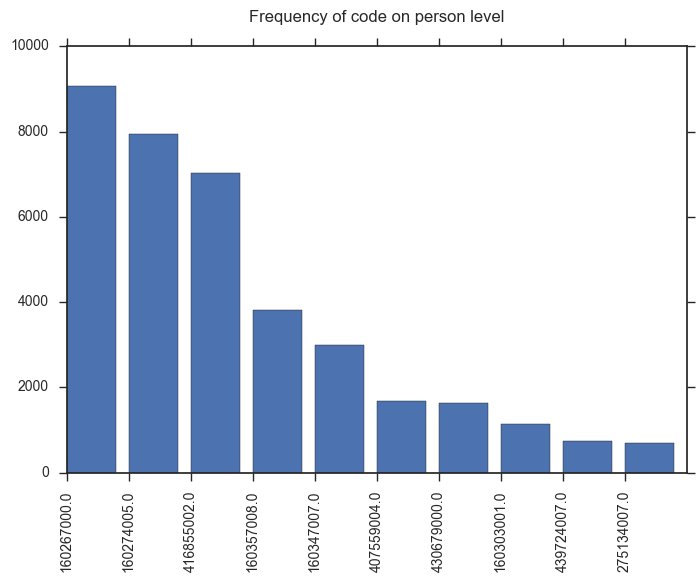

In [27]:
codefr={k:len(v.drop_duplicates()) for k,v in fam_his.groupby('Code').Person_Nbr}
temp=sorted(codefr.items(), key=lambda x:x[1], reverse=True)[:10]
print "\nCode\t Frequency\t Description\n"
pprint.pprint([(k[0],k[1],fam_his.groupby('Code').first().loc[k[0],'Family_History']) for k in temp])
plt.bar(range(0,len(temp)), [item[1] for item in temp])
plt.xticks(range(0,len(temp)), [item[0] for item in temp], rotation='vertical')
plt.title('Frequency of code on person level\n')
plt.show()

Separate frequency graphs for each type of Relation 

In [6]:
Parents=fam_his[fam_his.Relation=='Parents']
Siblings=fam_his[fam_his.Relation=='Siblings']
Relatives=fam_his[fam_his.Relation=='Relatives']
Grandparents=fam_his[fam_his.Relation=='Grandparents']
Children=fam_his[fam_his.Relation=='Children']
Spouse=fam_his[fam_his.Relation=='Spouse']

All Parents data Grouped by Code and counting frequency once per patient


Code	 Frequency	 Description

[(160267000.0, 9059, 'No history of Glaucoma'),
 (160274005.0, 7936, 'No history of Diabetes mellitus'),
 (416855002.0, 6360, 'Diabetes'),
 (160357008.0, 2907, 'HBP'),
 (160347007.0, 2081, 'Glaucoma'),
 (407559004.0, 1674, 'Unknown'),
 (430679000.0, 860, 'Diabetes Type 2'),
 (439724007.0, 557, 'Heart Disease'),
 (275134007.0, 477, 'Arthritis'),
 (160348002.0, 216, 'Cataracts')]


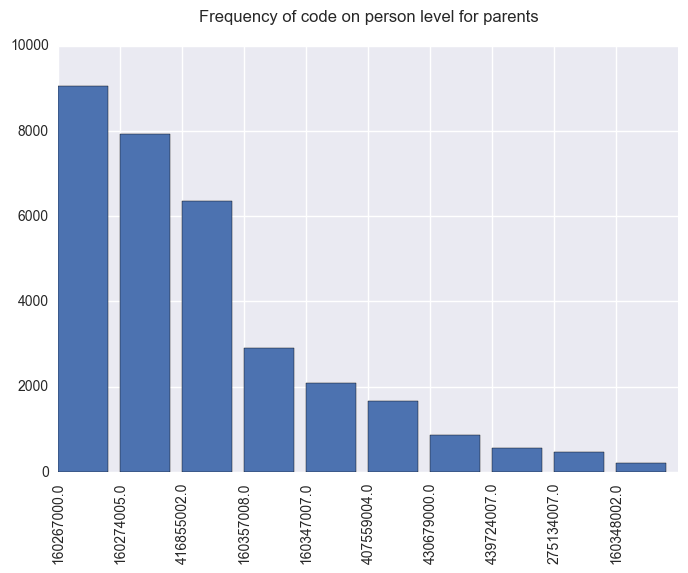

In [9]:
codefrp={k:len(v.drop_duplicates()) for k,v in Parents.groupby('Code').Person_Nbr}
temp=sorted(codefrp.items(), key=lambda x:x[1], reverse=True)[:10]
print "\nCode\t Frequency\t Description\n"
pprint.pprint([(k[0],k[1],fam_his.groupby('Code').first().loc[k[0],'Family_History']) for k in temp])
plt.bar(range(0,len(temp)), [item[1] for item in temp])
plt.xticks(range(0,len(temp)), [item[0] for item in temp], rotation='vertical')
plt.title('Frequency of code on person level for parents\n')
plt.show()

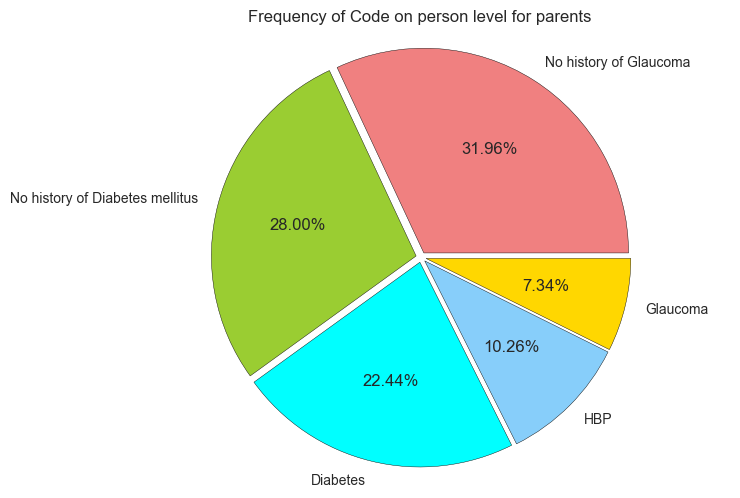

In [11]:
temp=sorted(codefrp.items(), key=lambda x:x[1], reverse=True)[:5]
labels=[Parents.groupby('Code').first().loc[k[0],'Family_History'] for k in temp]
fracs = [temp[0][1],temp[1][1],temp[2][1],temp[3][1],temp[4][1]]
colors = ['lightcoral', 'yellowgreen', 'cyan', 'lightskyblue','gold']
explode = (0.025, 0.025, 0.025, 0.025,0.025)  # explode 1st slice
plt.pie(fracs, labels=labels,autopct='%1.2f%%',colors=colors,explode=explode)
plt.axis('equal')
plt.title('Frequency of Code on person level for parents\n')
plt.show()

All Grandparents data Grouped by Code and counting frequency once per patient


Code	 Frequency	 Description

[(160303001.0, 521, 'Diabetes'),
 (160347007.0, 434, 'Glaucoma'),
 (160357008.0, 256, 'HBP'),
 (430679000.0, 231, 'Diabetes Type 2'),
 (275134007.0, 82, 'Arthritis'),
 (439724007.0, 70, 'Heart Disease'),
 (275118009.0, 50, 'Blindness'),
 (160348002.0, 37, 'Cataracts'),
 (430678008.0, 22, 'Diabetes Type 1'),
 (429740004.0, 20, 'Breast Cancer')]


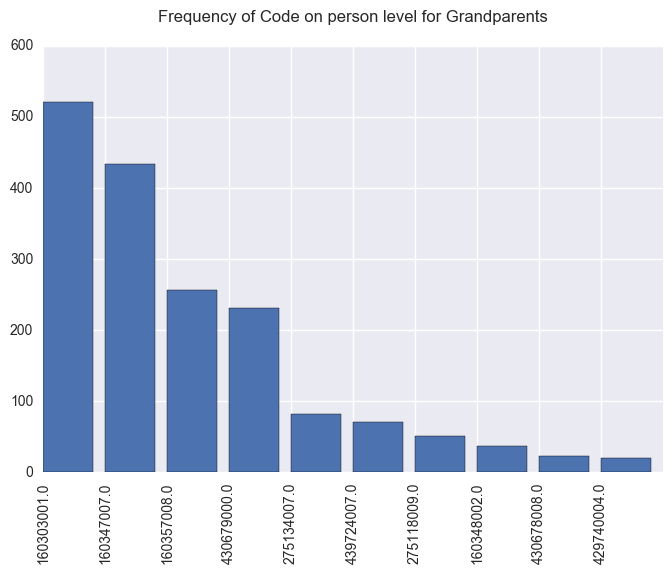

In [12]:
codefrgp={k:len(v.drop_duplicates()) for k,v in Grandparents.groupby('Code').Person_Nbr}
temp=sorted(codefrgp.items(), key=lambda x:x[1], reverse=True)[:10]
print "\nCode\t Frequency\t Description\n"
pprint.pprint([(k[0],k[1],fam_his.groupby('Code').first().loc[k[0],'Family_History']) for k in temp])
plt.bar(range(0,len(temp)), [item[1] for item in temp])
plt.xticks(range(0,len(temp)), [item[0] for item in temp], rotation='vertical')
plt.title('Frequency of Code on person level for Grandparents\n')
plt.show()

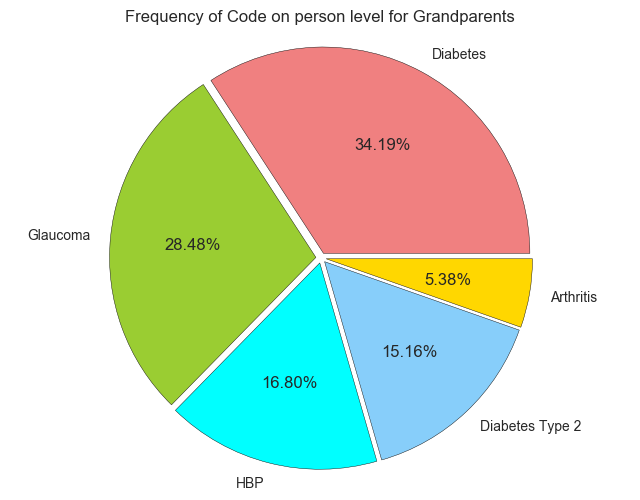

In [20]:
temp=sorted(codefrgp.items(), key=lambda x:x[1], reverse=True)[:5]
labels=[Grandparents.groupby('Code').first().loc[k[0],'Family_History'] for k in temp]
fracs = [temp[0][1],temp[1][1],temp[2][1],temp[3][1],temp[4][1]]
colors = ['lightcoral', 'yellowgreen', 'cyan', 'lightskyblue','gold']
explode = (0.025, 0.025, 0.025, 0.025,0.025)  # explode 1st slice
plt.pie(fracs, labels=labels,autopct='%1.2f%%',colors=colors,explode=explode)
plt.axis('equal')
plt.title('Frequency of Code on person level for Grandparents\n')
plt.show()

All Siblings data Grouped by Code and counting frequency once per patient


Code	 Frequency	 Description

[(416855002.0, 1173, 'Diabetes'),
 (160357008.0, 810, 'HBP'),
 (430679000.0, 538, 'Diabetes Type 2'),
 (160347007.0, 479, 'Glaucoma'),
 (275134007.0, 125, 'Arthritis'),
 (439724007.0, 113, 'Heart Disease'),
 (160303001.0, 107, 'Diabetes'),
 (160348002.0, 52, 'Cataracts'),
 (430678008.0, 49, 'Diabetes Type 1'),
 (430292006.0, 47, 'Breast Cancer')]


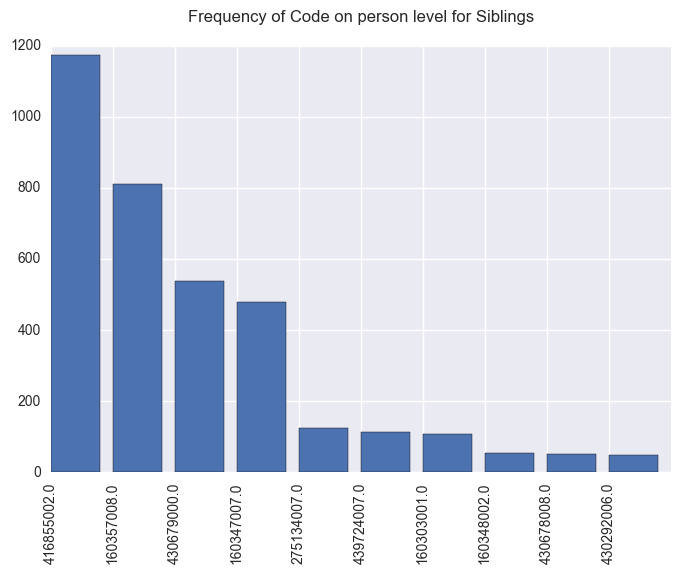

In [14]:
codefrs={k:len(v.drop_duplicates()) for k,v in Siblings.groupby('Code').Person_Nbr}
temp=sorted(codefrs.items(), key=lambda x:x[1], reverse=True)[:10]
print "\nCode\t Frequency\t Description\n"
pprint.pprint([(k[0],k[1],fam_his.groupby('Code').first().loc[k[0],'Family_History']) for k in temp])
plt.bar(range(0,len(temp)), [item[1] for item in temp])
plt.xticks(range(0,len(temp)), [item[0] for item in temp], rotation='vertical')
plt.title('Frequency of Code on person level for Siblings\n')
plt.show()

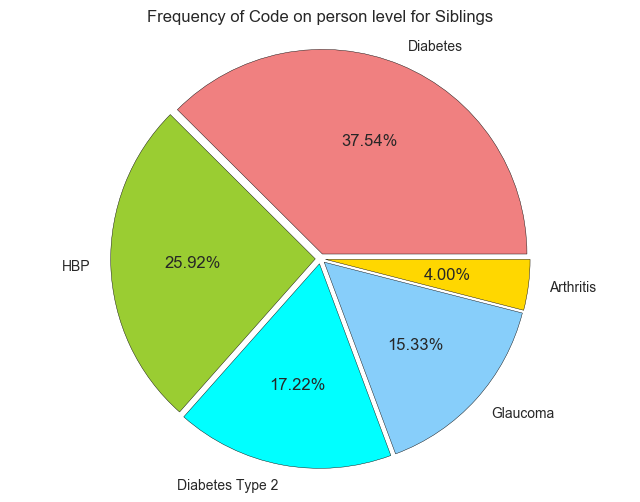

In [19]:
temp=sorted(codefrs.items(), key=lambda x:x[1], reverse=True)[:5]
labels=[Siblings.groupby('Code').first().loc[k[0],'Family_History'] for k in temp]
fracs = [temp[0][1],temp[1][1],temp[2][1],temp[3][1],temp[4][1]]
colors = ['lightcoral', 'yellowgreen', 'cyan', 'lightskyblue','gold']
explode = (0.025, 0.025, 0.025, 0.025,0.025)  # explode 1st slice
plt.pie(fracs, labels=labels,autopct='%1.2f%%',colors=colors,explode=explode)
plt.axis('equal')
plt.title('Frequency of Code on person level for Siblings\n')
plt.show()

All Children data Grouped by Code and counting frequency once per patient


Code	 Frequency	 Description

[(416855002.0, 142, 'Diabetes'),
 (160357008.0, 128, 'HBP'),
 (430679000.0, 78, 'Diabetes Type 2'),
 (160347007.0, 60, 'Glaucoma'),
 (275134007.0, 21, 'Arthritis'),
 (160303001.0, 17, 'Diabetes'),
 (160346003.0, 16, 'Amblyopia'),
 (439724007.0, 16, 'Heart Disease'),
 (430678008.0, 16, 'Diabetes Type 1'),
 (160377001.0, 13, 'Asthma')]


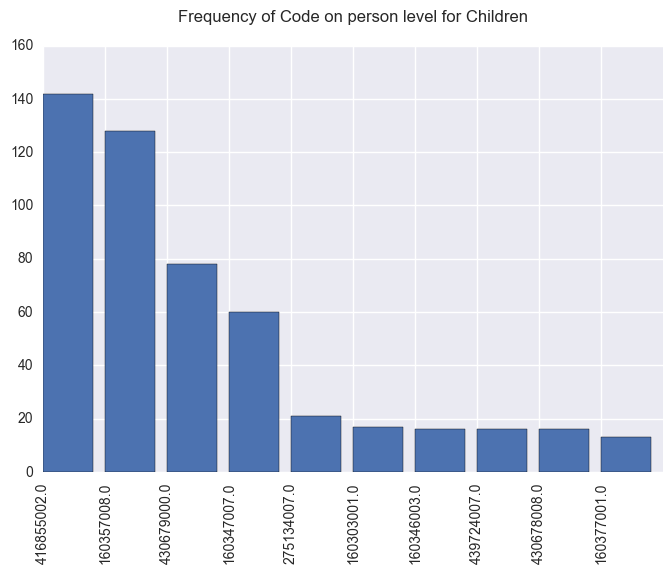

In [16]:
codefrc={k:len(v.drop_duplicates()) for k,v in Children.groupby('Code').Person_Nbr}
temp=sorted(codefrc.items(), key=lambda x:x[1], reverse=True)[:10]
print "\nCode\t Frequency\t Description\n"
pprint.pprint([(k[0],k[1],fam_his.groupby('Code').first().loc[k[0],'Family_History']) for k in temp])
plt.bar(range(0,len(temp)), [item[1] for item in temp])
plt.xticks(range(0,len(temp)), [item[0] for item in temp], rotation='vertical')
plt.title('Frequency of Code on person level for Children\n')
plt.show()

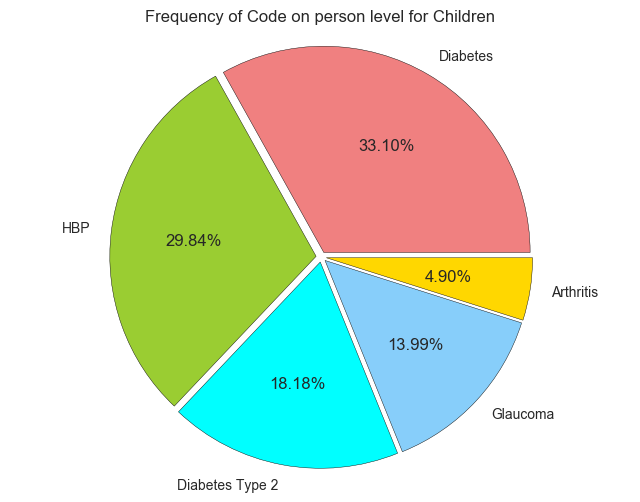

In [18]:
temp=sorted(codefrc.items(), key=lambda x:x[1], reverse=True)[:5]
labels=[Children.groupby('Code').first().loc[k[0],'Family_History'] for k in temp]
fracs = [temp[0][1],temp[1][1],temp[2][1],temp[3][1],temp[4][1]]
colors = ['lightcoral', 'yellowgreen', 'cyan', 'lightskyblue','gold']
explode = (0.025, 0.025, 0.025, 0.025,0.025)  # explode 1st slice
plt.pie(fracs, labels=labels,autopct='%1.2f%%',colors=colors,explode=explode)
plt.axis('equal')
plt.title('Frequency of Code on person level for Children\n')
plt.show()

All Relatives data Grouped by Code and counting frequency once per patient


Code	 Frequency	 Description

[(160303001.0, 466, 'Diabetes'),
 (160347007.0, 290, 'Glaucoma'),
 (430679000.0, 250, 'Diabetes Type 2'),
 (160357008.0, 233, 'HBP'),
 (275118009.0, 51, 'Blindness'),
 (275134007.0, 49, 'Arthritis'),
 (439724007.0, 35, 'Heart Disease'),
 (430678008.0, 31, 'Diabetes Type 1'),
 (429740004.0, 24, 'Breast Cancer'),
 (23986001.0, 20, 'Glaucoma')]


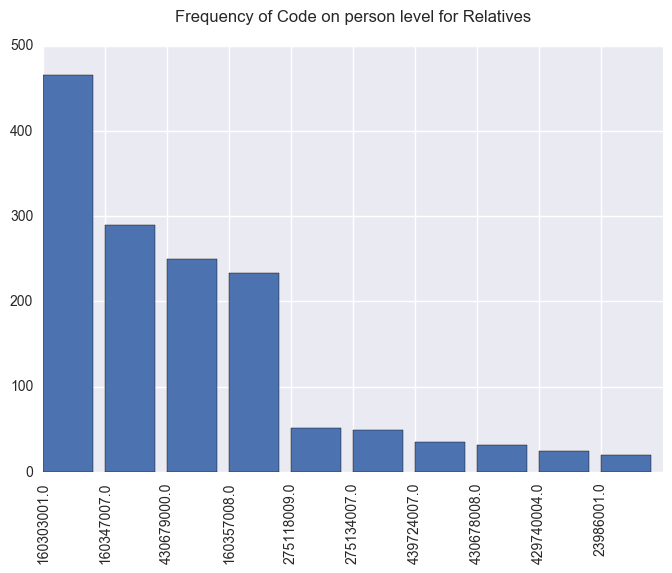

In [21]:
codefrr={k:len(v.drop_duplicates()) for k,v in Relatives.groupby('Code').Person_Nbr}
temp=sorted(codefrr.items(), key=lambda x:x[1], reverse=True)[:10]
print "\nCode\t Frequency\t Description\n"
pprint.pprint([(k[0],k[1],fam_his.groupby('Code').first().loc[k[0],'Family_History']) for k in temp])
plt.bar(range(0,len(temp)), [item[1] for item in temp])
plt.xticks(range(0,len(temp)), [item[0] for item in temp], rotation='vertical')
plt.title('Frequency of Code on person level for Relatives\n')
plt.show()

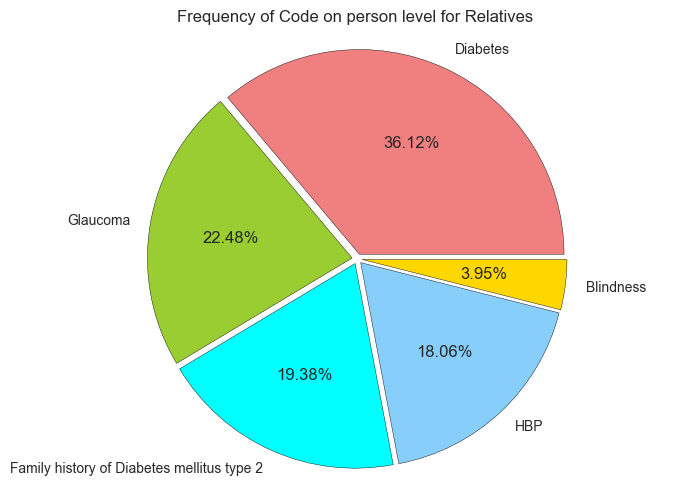

In [22]:
temp=sorted(codefrr.items(), key=lambda x:x[1], reverse=True)[:5]
labels=[Relatives.groupby('Code').first().loc[k[0],'Family_History'] for k in temp]
fracs = [temp[0][1],temp[1][1],temp[2][1],temp[3][1],temp[4][1]]
colors = ['lightcoral', 'yellowgreen', 'cyan', 'lightskyblue','gold']
explode = (0.025, 0.025, 0.025, 0.025,0.025)  # explode 1st slice
plt.pie(fracs, labels=labels,autopct='%1.2f%%',colors=colors,explode=explode)
plt.axis('equal')
plt.title('Frequency of Code on person level for Relatives\n')
plt.show()

All Spouse data Grouped by Code and counting frequency once per patient


Code	 Frequency	 Description

[(160357008.0, 1, 'HBP'),
 (430679000.0, 1, 'Diabetes Type 2'),
 (275134007.0, 1, 'Arthritis')]


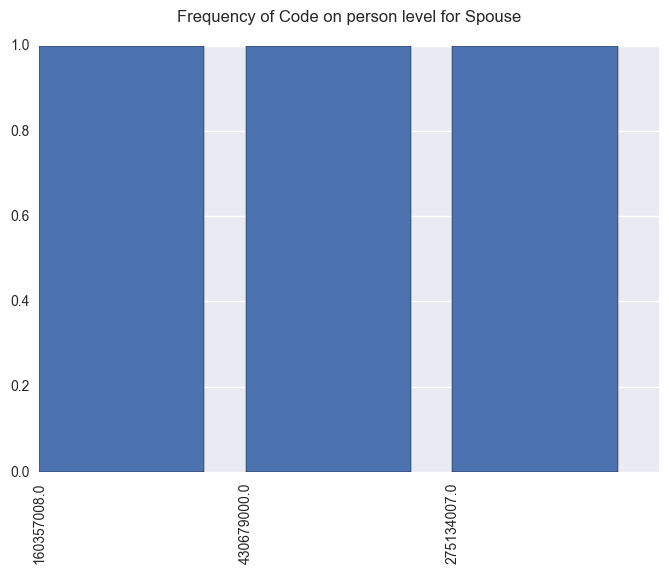

In [24]:
codefrsp={k:len(v.drop_duplicates()) for k,v in Spouse.groupby('Code').Person_Nbr}
temp=sorted(codefrsp.items(), key=lambda x:x[1], reverse=True)[:10]
print "\nCode\t Frequency\t Description\n"
pprint.pprint([(k[0],k[1],fam_his.groupby('Code').first().loc[k[0],'Family_History']) for k in temp])
plt.bar(range(0,len(temp)), [item[1] for item in temp])
plt.xticks(range(0,len(temp)), [item[0] for item in temp], rotation='vertical')
plt.title('Frequency of Code on person level for Spouse\n')
plt.show()

Getting only Parents and Grandparents codes

In [53]:
codes=pd.DataFrame(columns=["Person_Nbr","Code"])
count=0
coindex=0
for index,row in single_person_all1.iterrows():
    codes.loc[coindex,"Person_Nbr"]=row.Person_Nbr
    codes.loc[coindex,"Code"]=""
    if pd.isnull(row.Relation):
        pass
    elif row.Relation.startswith('Grandparents;Parents'):
        idx = [n for n in xrange(len(row.Code)) if row.Code.find(';', n) == n]
        subs = row.Code[:idx[-1]+1]
        codes.loc[coindex,"Code"]=codes.loc[coindex,"Code"]+subs
    elif row.Relation.startswith('Parents'):
        idx = row.Code.find(';')
        subs = row.Code[:idx+1]
        codes.loc[coindex,"Code"]=codes.loc[coindex,"Code"]+subs
    elif row.Relation.startswith('Granparents'):
        idx = row.Code.find(';')
        subs = row.Code[:idx+1]
        codes.loc[coindex,"Code"]=codes.loc[coindex,"Code"]+subs
    coindex+=1

In [54]:
codes.to_csv('codes.csv')
print codes.shape
codes.head()

(16087, 2)


,Person_Nbr,Code
0,33,"160347007.0,160274005.0,160274005.0,160267000.0;"
1,327,"416855002.0,160274005.0,160267000.0,160267000.0;"
2,335,"416855002.0,275134007.0,160357008.0,160267000...."
3,1515,"416855002.0,160267000.0,160274005.0,160267000.0;"
4,1519,"160274005.0,160267000.0,160274005.0,160267000.0;"


In [36]:
diagnosis = {
            #parents DM
            "PDM" : "416855002",
            #fm of dm
            "FDM" : "160303001",
            #Macular Degeneration
            "MD" : "431812006",
            #DR
            "DR" : "4855003",
            
        }
for diagnosis, pattern in diagnosis.iteritems():
        codes[diagnosis]=codes["Code"].str.contains(pattern)

In [57]:
print len(codes.DR)
print "PDM"
print sum(codes.PDM)
print "FDM"
print sum(codes.FDM)
print "MD"
print sum(codes.MD)
print "DR"
print sum(codes.DR)

16087
PDM
6229
FDM
547
MD
61
DR
6


In [ ]:
#other codes related to DR but absent in the table
#59276001 Proliferative diabetic retinopathy
#399875001 Non-high-risk proliferative diabetic retinopathy with clinically significant macular oedema
#721103006 no DR
#417677008 VT DR
#390834004 NPDR
#390834004 NPDR

Parent/GP diagnosis

In [10]:
single_person_all1=pd.read_csv(interpath+'single_person_all1.csv')
del single_person_all1["Unnamed: 0"]

In [11]:
diagnosis1 = {
            #parents DM or dt2 or fm of dia or dt1
            "DM" : ['416855002','430679000','160303001','430678008'],
            # No DM
            "NDM" : ['160274005'],
            #Glaucoma
            "G" : ['160347007'],
            #No Glaucoma
            "NG": ['160267000'],
            #unknown
            "Unknown" :['407559004'],
        }


In [12]:
pgp=pd.DataFrame(columns=["Person_Nbr"])
count=0
coindex=0
for index,row in single_person_all1.iterrows():
    pgp.loc[coindex,"Person_Nbr"]=row.Person_Nbr
    if pd.isnull(row.Relation):
        pass
    elif row.Relation.startswith('Grandparents;Parents'):
        idx = row.Code.find(';')
        subs = row.Code[:idx+1]
        for diagnosis, pattern in diagnosis1.iteritems():
            pgp.loc[coindex,"GP_"+diagnosis]=False
            for x in pattern:
                if x in subs:
                    pgp.loc[coindex,"GP_"+diagnosis]=True
        idx1 = [n for n in xrange(len(row.Code)) if row.Code.find(';', n) == n]
        subs1 = row.Code[idx+1:idx1[-1]+1]
        for diagnosis, pattern in diagnosis1.iteritems():
            pgp.loc[coindex,"P_"+diagnosis]=False
            for x in pattern:
                if x in subs1:
                    pgp.loc[coindex,"P_"+diagnosis]=True
    elif row.Relation.startswith('Parents'):
        idx = row.Code.find(';')
        subs = row.Code[:idx+1]
        for diagnosis, pattern in diagnosis1.iteritems():
            pgp.loc[coindex,"P_"+diagnosis]=False
            for x in pattern:
                if x in subs:
                    pgp.loc[coindex,"P_"+diagnosis]=True
    elif row.Relation.startswith('Granparents'):
        idx = row.Code.find(';')
        subs = row.Code[:idx+1]
        #print subs
        for diagnosis, pattern in diagnosis1.iteritems():
            pgp.loc[coindex,"P_"+diagnosis]=False
            #print diagnosis
            #print pattern
            for x in pattern:
                #print x
                if x in subs:
                    #print "x in subs"
                    pgp.loc[coindex,"P_"+diagnosis]=True
    coindex+=1

In [17]:
pgp.to_csv('pgp.csv')
print pgp.shape
pgp.head(n=7)

(16087, 11)


,Person_Nbr,P_Unknown,P_DM,P_NDM,P_G,P_NG,GP_Unknown,GP_DM,GP_NDM,GP_G,GP_NG
0,33,False,False,True,True,True,NaN,NaN,NaN,NaN,NaN
1,327,False,True,True,False,True,NaN,NaN,NaN,NaN,NaN
2,335,False,True,True,False,True,NaN,NaN,NaN,NaN,NaN
3,1515,False,True,True,False,True,NaN,NaN,NaN,NaN,NaN
4,1519,False,False,True,False,True,NaN,NaN,NaN,NaN,NaN
5,1628,False,True,False,False,False,False,False,False,False,False
6,1670,True,True,True,False,True,NaN,NaN,NaN,NaN,NaN


In [23]:
stats={"P_DM" : sum(pgp.P_DM),"P_NDM": sum(pgp.P_NDM),"P_G":sum(pgp.P_G),"P_NG":sum(pgp.P_NG),"P_Unknown":sum(pgp.P_Unknown),
      "GP_DM":sum(pgp.GP_DM),"GP_NDM":sum(pgp.GP_NDM),"GP_G":sum(pgp.GP_G), "GP_NG":sum(pgp.GP_NG),"GP_Unknown":sum(pgp.GP_Unknown)}

In [42]:
print "Total count:"
print sum(stats.values())
stats

Total count:
28185


{'GP_DM': 638,
 'GP_G': 350,
 'GP_NDM': 0,
 'GP_NG': 0,
 'GP_Unknown': 0,
 'P_DM': 6948,
 'P_G': 2086,
 'P_NDM': 7713,
 'P_NG': 8823,
 'P_Unknown': 1627}

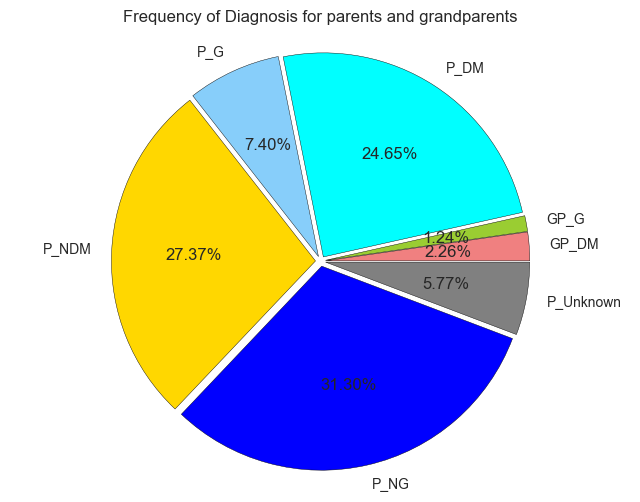

In [43]:
labels = 'GP_DM', 'GP_G', 'P_DM', 'P_G',"P_NDM","P_NG",'P_Unknown'
fracs = [stats.get('GP_DM'),stats.get('GP_G'),stats.get('P_DM'),stats.get('P_G'),stats.get('P_NDM'),
        stats.get('P_NG'),stats.get('P_Unknown')]
colors = ['lightcoral', 'yellowgreen', 'cyan', 'lightskyblue','gold','blue','grey']
explode = (0.025, 0.025, 0.025, 0.025,0.025,0.025,0.025)  # explode 1st slice
plt.pie(fracs, labels=labels,autopct='%1.2f%%',colors=colors,explode=explode)
plt.axis('equal')
plt.title('Frequency of Diagnosis for parents and grandparents\n')
plt.show()

Merge with single_person_all1

In [44]:
print pgp.shape
single_person_all1.shape

(16087, 11)


(16087, 49)

In [45]:
single_person_all2=pd.merge(single_person_all1,pgp,left_index=True,right_index=True,how="left")
print single_person_all2.shape
single_person_all2.head()

(16087, 60)


,Enc_Nbr,Person_Nbr_x,Smoking_Status,Primary_Payer,A1C,BMI,Glucose,BP_Systolic,BP_Diastolic,Enc_Yr,...,P_Unknown,P_DM,P_NDM,P_G,P_NG,GP_Unknown,GP_DM,GP_NDM,GP_G,GP_NG
0,123227.0,33.0,Never smoker,Premier Vision Plan,8.0,0.00,130.0,59.0,39.0,2014-12-18 00:00:00,...,False,False,True,True,True,NaN,NaN,NaN,NaN,NaN
1,14361139.0,327.0,Never smoker,Medicare,0.0,0.00,121.0,0.0,0.0,2011-12-04 00:00:00,...,False,True,True,False,True,NaN,NaN,NaN,NaN,NaN
2,11783809.0,335.0,Former smoker,Blue Shield Of Illinois PPO,0.0,0.00,103.0,0.0,0.0,2013-10-16 00:00:00,...,False,True,True,False,True,NaN,NaN,NaN,NaN,NaN
3,6074701.0,1515.0,Never smoker,VOHHA,0.0,0.00,200.0,130.0,80.0,2012-10-01 00:00:00,...,False,True,True,False,True,NaN,NaN,NaN,NaN,NaN
4,8583237.0,1519.0,Former smoker,Opticare CountyCare,0.0,37.11,118.0,110.0,80.0,2014-07-01 00:00:00,...,False,False,True,False,True,NaN,NaN,NaN,NaN,NaN


In [46]:
del single_person_all2["Person_Nbr_y"]
single_person_all2=single_person_all2.rename(columns={"Person_Nbr_x":"Person_Nbr"})
single_person_all2.to_csv("single_person_all2.csv")